### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

### Optimal Soccer Team Based on Preference

#### Takashi Matsuzawa (tmatsuzawa@wisc.edu), Zijian Jiang (zjiang243@wisc.edu), Ang Li (ali98@wisc.edu), and Runze Yang (ryang65@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

This report was aimed at elaborating and analyzing our final project about selecting the optimal soccer team based on preference and expected emphasis of a team. From the standpoint of fans of soccer video games, people may always dream about building their own personalized soccer team through selecting players by themselves. Fans normally have different preference over what kind of team they intended to construct, for example they may want a team with more players who have stronger ability in attacking. The dataset in the game have soccer players’ scores in different aspects of capability. Therefore, our models can help soccer video gamers who have this type of wish to build their personalized teams more easily. Furthermore, in reality, utilizing optimization and statistical analysis on organizing a team can also be critical to strengthen the team’s quality in the specific aspect and to better distribute the budget of a club in order to make the team as cost-effective as possible.

We constructed models that optimize soccer team with four areas of emphasis, which are attack, midfield, defense and the overall rating, by choosing players according to their particular ability. First, we set up a annual budget limit for the whole team, so the sum of annual salaries of all players chosen should at least not exceed this limit. Then maximizing the sum of ability scores in either attack, midfield or defense over all selected players based on the team preference of gamers. The data we used, obtained from https://fifaforums.easports.com/en/discussion/138979/fut-player-database
, was imported from the soccer video game FIFA Ultimate Team 2016. Initially we had data for a couple of thousand players. Since it would take a considerable amounts of time for Julia to find out the optimal solution among such a huge database, we decided to reduce the size into 360. There are 13 different positions that can be classified into 3 categories: 

*1. Attacker which includes RW (Right Wing), LW (Left Wing), ST(Striker), CF (Center Forward)

| Name       |Overall Rating|Position       | Pace      | Dribbling  |...|Long Shot|Attack Ability(before)|After replacement|
|------------|--------------|---------------|:----------|------------|---|---------|----------------------|-----------------|
| Manuel     |96            |GK (defender)  |88         |89          |...|16       |66.5                  |66.5             |
|  Lionel    |99            |RW (attacker)  |83         |90          |...|85       |82                    |99               |
| Paul       |93            |CM (midfielder)|84         |93          |...|98       |93                    |93               |

*2. Midfielder which includes CM (Center Midfielder), CAM (Center Attack Midfielder), CDM (Center Defend Midfielder), LM (Left Midfielder), RM (Right Midfielder)


| Name       |Overall Rating|Position       |Agility    | Dribbling  |...|Short Pass|Midfield Ability(before)|After replacement|
|------------|--------------|---------------|:----------|------------|---|----------|------------------------|-----------------|
| Manuel     |96            |GK (defender)  |43         |35          |...|42        |16.5                    |16.5             |
|  Lionel    |99            |RW (attacker)  |83         |79          |...|88        |67.6                    |67.6             |
| Paul       |93            |CM (midfielder)|81         |65          |...|93        |88                      |93               |

*3. Defender which includes CB (Center Back), LB (Left Back), RB (Right Back) and GK (Goalkeeper)



| Name       |Overall Rating|Position       |Sliding Tackle| Jumping|...|Defending|Defence Ability(before) |After replacement|
|------------|--------------|---------------|:-------------|--------|---|---------|------------------------|-----------------|
| Manuel     |96            |GK (defender)  |11            |78      |...|58       |88.3                    |96               |
|  Lionel    |99            |RW (attacker)  |83            |79      |...|88       |66.3                    |66.3             |
| Paul       |93            |CM (midfielder)|81            |65      |...|93       |88.6                    |88.6             |

### Dataset:
Each player has a set of scores for different abilities or skills, such as shooting, passing, positioning and also annual salary. There are in total of 27 types of abilities we decided to use, and we divided them into three categories. In the data csv file, abilities from 13th. to 20th. columns are considered as attack abilities, abilities from 22th. to 33th. columns are considered as midfield abilities, and abilities from 35th. to 41th. columns. In order to make our data clean and readable, we implemented a function called analyzeData() which first found out the mean of all abilities within the same category (i.e. take the average of 13th. to 20th. columns as the overall attack ability). After that we identified the type of each player and assigned their overall rating (1st row) into their corresponding ability. For instance, if a player A is a CF(attacker) which has rating of 90, then we assign 90 as his overall attack ability and this will overwrite the pre-calculated overall attack ability only.

The outline of the report will be as follows: First, we present mathematical models of the project based on the gamer’s preference on the type of soccer team, which are attacking, midfield, defending and also the overall rating. Then, we present the Julia code behind each model and analysis of our data. Next, we illustrate plots as well as figures, interpret the results generated from our models, and discuss the limitations of our model. Finally, we summarize our results and findings, and state the improvements we can make for the future direction of the project.

## 2. Mathematical model ##

All of the models are integer linear programs (all binary variables 0 or 1). In order to know which players should be picked, binary vectors are created. Each vector represents a certain player. If a player is picked, its value is assigned as 1. Otherwise, they are assigned as 0. The vector “k” represents this variable.  

There are four types of constraints in this model. The first constraint requires that the total player salary does not exceed the maximum salary limit. The total salary can be calculated by using the sum of product between the binary variable vector and salary data column. Here is the constraint: 

\begin{equation}
\begin{aligned}
& & &  \ K^T\cdot \le MaxSalary \\
\end{aligned}
\end{equation}

The second type of constraint requires that the amounts of players from each position that are selected should be appropriate. For each possible position, there is a minimum and maximum limit. In order to satisfy this requirement, the number of players in each position should be greater than the lower bound and less than the higher bound. Here is an example of one of the constraints:

\begin{equation}
\begin{aligned}
& & &  minLimit \le \sum_{i\in LW}k_i \le LWLimit         \\
\end{aligned}
\end{equation}

The third type of constraint requires that the amounts of players from each category that are selected should be appropriate. Similar to the second type, for each possible position, there is a minimum and maximum limit, and the number of players in each position should be greater than the lower bound and less than the higher bound. Here is an example of one of the constraints:

\begin{equation}
\begin{aligned}
& & &  minForward \le \sum_{i\in attack}k_i \le maxForward \\
\end{aligned}
\end{equation}


The fourth constraint implies that only a given number of players can come from the same club. Having players from the same club is risky and not beneficial to the balance of the fantasy team. The reason is that if the team does poorly, both players are also likely to perform poorly. In order to represent this constraint, a vector of unique team names is derived and represented by “C”. Then, the sum over the indices of the binary decision variable elements that represent a player from that particular team must be less than or equal to the given parameter amount. Here is the team constraint:

\begin{equation}
\begin{aligned}
& & &  \sum_{i\in club_j}k_i \le CBLimit   &\forall j \in C        \\
\end{aligned}
\end{equation}

The objective is trying to pursue the maximization of total abilities using application variable called λ. λ can be chosen between 0 and 1. The greater the value is, more strongly the corresponding category/field is favored (If you want to make a balance model, set λ to 1/3).

Here is the entire attack model:

\begin{equation}
\begin{aligned}
& \underset{k}{\text{maximize}}
& & \lambda \cdot \sum_{i\in\ attack} k_i + \frac{1- \lambda}{2} \cdot\sum_{i\in midUdenfense}^{r}k_i           & \forall j = 1,\dots , n \\
& \text{subject to} & & \sum_{i\in GK} k_i = GKlimit \\
& & &  \ K^T\cdot \le MaxSalary \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LWLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RWLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le STLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CFLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CAMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CDMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le GKLimit         \\
& & &        \\
& & &  minForward \le \sum_{i\in attack}k_i \le maxForward \\
& & &  minMid \le \sum_{i\in midfield}k_i \le maxMid       \\
& & &  minBack \le \sum_{i\in defend}k_i \le maxBack     \\
& & &  \sum_{i}k_i = Num = 11   \\
& & &  \sum_{i\in club_j}k_i \le CBLimit   &\forall j \in C        \\
& & &  k_i \in 0,1  &\forall i = 1,2 \dots , n \\   
\end{aligned}
\end{equation}

The midfield and defend models are similar except that λ are used to multiply the sum of midfield and defensive abilities.

The rating model is similar except that for objective, instead of using λ to find the optimization, we sum up the overall rating of all members that are selected and find its maximization.

\begin{equation}
\begin{aligned}
& \underset{k}{\text{maximize}}
& & \sum_{i\in\ attackUmidfieldUdefense} k_i 
& \forall j = 1,\dots , n \\
& \text{subject to} & & \sum_{i\in GK} k_i = GKlimit \\
& & &  \ K^T\cdot \le MaxSalary \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LWLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RWLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le STLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CFLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CAMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CDMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RMLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le CBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le LBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le RBLimit         \\
& & &  minLimit \le \sum_{i\in LW}k_i \le GKLimit         \\
& & &        \\
& & &  minForward \le \sum_{i\in attack}k_i \le maxForward \\
& & &  minMid \le \sum_{i\in midfield}k_i \le maxMid       \\
& & &  minBack \le \sum_{i\in defend}k_i \le maxBack     \\
& & &  \sum_{i}k_i = Num = 11   \\
& & &  \sum_{i\in club_j}k_i \le CBLimit   &\forall j \in C        \\
& & &  k_i \in 0,1  &\forall i = 1,2 \dots , n \\   
\end{aligned}
\end{equation}

## 3. Solution ##


In [65]:
using JuMP

function analyzeData(raw)
    
    N = size(raw)[1] 
    raw = raw[2:N, :]

    raw[:,21] = sum(raw[:,i] for i = 13:20)/8
    raw[:,34] = sum(raw[:,i] for i = 22:33)/12
    raw[:,42] = sum(raw[:,i] for i = 35:41)/7

    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's

    for i in [LWindex, RWindex, STindex, CFindex]
        raw[i, 21] = raw[i, 1]
    end

    for i in [CMindex, LMindex, RMindex, CAMindex, CDMindex]
        raw[i, 34] = raw[i, 1]
    end

    for i in [CBindex, LBindex, RBindex, GKindex]
        raw[i, 42] = raw[i, 1]
    end
    
    return raw
end;

In [66]:
using JuMP, Cbc

function attackModel(λ, CBlimit, maxSalary, raw)
    
    N = size(raw)[1]                   # Number of players
    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's
    
    clubs = unique(raw[:,7])           # List of unique clubs of the players
    Num = 11                           # Total players in a team
    T = length(clubs)                  # Number of unique clubs
    minLimit = 0                       # Minimum number of player in every position (0)
    minForward = 1                     # Minimum number of forward players(including LW, RW, ST, CF)
    maxForward = 3                     # Maximum number of forward players(including LW, RW, ST, CF)
    minMid = 3                         # Minimum number of midfield players(including CM, CAM, CDM, LM, RM)
    maxMid = 5                         # Maximum number of midfield players(including CM, CAM, CDM, LM, RM)
    minBack = 2                        # Minimum number of back players(including CB, LB, RB)
    maxBack = 4                        # Maximum number of back players(including CB, LB, RB)
    
    # Maximum number of player in every position
    GKlimit = LWlimit = RWlimit = STlimit = CFlimit = CMlimit = CAMlimit = 1  
    CDMlimit = LMlimit = RMlimit = CAMlimit =  LBlimit = RBlimit = 1
    CBlimit = 2
    
    m = Model(solver=CbcSolver())
    
    @variable(m, k[1:N], Bin)             # Indicator variable:  1- Player on team, 0- Player not on team
    @constraint(m, sum{k[i]*raw[i,2], i=1:N} <= maxSalary)           # Salary cap constraint
    @constraint(m, sum{k[i], i = GKindex} == GKlimit)                # Number of GK's constraint
    @constraint(m, minLimit <= sum{k[i], i = LWindex} <= LWlimit)    # Number of LW's constraint
    @constraint(m, minLimit <= sum{k[i], i = RWindex} <= RWlimit)    # Number of RW's constraint
    @constraint(m, minLimit <= sum{k[i], i = STindex} <= STlimit)    # Number of ST's constraint
    @constraint(m, minLimit <= sum{k[i], i = CFindex} <= CFlimit)    # Number of CF's constraint
    @constraint(m, minLimit <= sum{k[i], i = CMindex} <= CMlimit)    # Number of CM's constraint
    @constraint(m, minLimit <= sum{k[i], i = LMindex} <= LMlimit)    # Number of LM's constraint
    @constraint(m, minLimit <= sum{k[i], i = RMindex} <= RMlimit)    # Number of RM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CAMindex} <= CAMlimit)  # Number of CAM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CDMindex} <= CDMlimit)  # Number of CDM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CBindex} <= CBlimit)    # Number of CB's constraint
    @constraint(m, minLimit <= sum{k[i], i = LBindex} <= LBlimit)    # Number of LB's constraint
    @constraint(m, minLimit <= sum{k[i], i = RBindex} <= RBlimit)    # Number of RB's constraint
    
    # Number of players(forward, midfield and back)constraint
    @constraint(m, minForward <= sum{k[i], i = [LWindex; RWindex; STindex; CFindex]} <= maxForward)
    @constraint(m, minMid <= sum{k[i], i = [CMindex; LMindex; RMindex; CAMindex; CDMindex]} <= maxMid)
    @constraint(m, minBack <= sum{k[i], i = [CBindex; LBindex; RBindex]} <= maxBack)
    
    # Total number of players must be Num (11)
    @constraint(m, sum{k[i], i = [GKindex; LWindex; RWindex; STindex; CFindex; CMindex; LMindex; RMindex; CAMindex; CDMindex; 
                                                CBindex; LBindex; RBindex]} == Num)
    
    # Maximize the overall ability according to the value of λ
    @objective(m, Max, λ*sum{k[i]*raw[i,21], i=1:N} + (1-λ)/2*(sum{k[i]*raw[i,34], i=1:N} + sum{k[i]*raw[i,42], i=1:N}))
    
    solve(m);
    
    Ra = getvalue(sum(k.*raw[:,21]/Num))  # Average attack ability
    Rm = getvalue(sum(k.*raw[:,34]/Num))  # Average midfield ability
    Rd = getvalue(sum(k.*raw[:,42]/Num))  # Average defensive ability
    R = getvalue(sum(k.*raw[:,1]/Num))    # Average overall ability
    Ip = getvalue(k)                    # Indicator player vector
    
    return(R, Ra, Rm, Rd, Ip)
end;

In [67]:
using JuMP, Cbc

function midfieldModel(λ, CBlimit, maxSalary, raw)
    
    N = size(raw)[1]                   # Number of players
    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's
    
    clubs = unique(raw[:,7])           # List of unique clubs of the players
    Num = 11                           # Total players in a team
    T = length(clubs)                  # Number of unique clubs
    minLimit = 0                       # Minimum number of player in every position (0)
    minForward = 1                     # Minimum number of forward players(including LW, RW, ST, CF)
    maxForward = 3                     # Maximum number of forward players(including LW, RW, ST, CF)
    minMid = 3                         # Minimum number of midfield players(including CM, CAM, CDM, LM, RM)
    maxMid = 5                         # Maximum number of midfield players(including CM, CAM, CDM, LM, RM)
    minBack = 2                        # Minimum number of back players(including CB, LB, RB)
    maxBack = 4                        # Maximum number of back players(including CB, LB, RB)
    
    # Maximum number of player in every position
    GKlimit = LWlimit = RWlimit = STlimit = CFlimit = CMlimit = CAMlimit = 1  
    CDMlimit = LMlimit = RMlimit = CAMlimit =  LBlimit = RBlimit = 1
    CBlimit = 2
    
    m = Model(solver=CbcSolver())
    
    @variable(m, k[1:N], Bin)             # Indicator variable:  1- Player on team, 0- Player not on team
    @constraint(m, sum{k[i]*raw[i,2], i=1:N} <= maxSalary)           # Salary cap constraint
    @constraint(m, sum{k[i], i = GKindex} == GKlimit)                # Number of GK's constraint
    @constraint(m, minLimit <= sum{k[i], i = LWindex} <= LWlimit)    # Number of LW's constraint
    @constraint(m, minLimit <= sum{k[i], i = RWindex} <= RWlimit)    # Number of RW's constraint
    @constraint(m, minLimit <= sum{k[i], i = STindex} <= STlimit)    # Number of ST's constraint
    @constraint(m, minLimit <= sum{k[i], i = CFindex} <= CFlimit)    # Number of CF's constraint
    @constraint(m, minLimit <= sum{k[i], i = CMindex} <= CMlimit)    # Number of CM's constraint
    @constraint(m, minLimit <= sum{k[i], i = LMindex} <= LMlimit)    # Number of LM's constraint
    @constraint(m, minLimit <= sum{k[i], i = RMindex} <= RMlimit)    # Number of RM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CAMindex} <= CAMlimit)  # Number of CAM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CDMindex} <= CDMlimit)  # Number of CDM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CBindex} <= CBlimit)    # Number of CB's constraint
    @constraint(m, minLimit <= sum{k[i], i = LBindex} <= LBlimit)    # Number of LB's constraint
    @constraint(m, minLimit <= sum{k[i], i = RBindex} <= RBlimit)    # Number of RB's constraint
    
    # Number of players(forward, midfield and back)constraint
    @constraint(m, minForward <= sum{k[i], i = [LWindex; RWindex; STindex; CFindex]} <= maxForward)
    @constraint(m, minMid <= sum{k[i], i = [CMindex; LMindex; RMindex; CAMindex; CDMindex]} <= maxMid)
    @constraint(m, minBack <= sum{k[i], i = [CBindex; LBindex; RBindex]} <= maxBack)
    
    # Total number of players must be Num (11)
    @constraint(m, sum{k[i], i = [GKindex; LWindex; RWindex; STindex; CFindex; CMindex; LMindex; RMindex; CAMindex; CDMindex; 
                                                CBindex; LBindex; RBindex]} == Num)
    
    # Maximize the overall ability according to the value of λ
    @objective(m, Max, λ*sum{k[i]*raw[i,34], i=1:N} + (1-λ)/2*(sum{k[i]*raw[i,21], i=1:N} + sum{k[i]*raw[i,42], i=1:N}))
    
    solve(m);
    
    Ra = getvalue(sum(k.*raw[:,21]/Num))  # Average attack ability
    Rm = getvalue(sum(k.*raw[:,34]/Num))  # Average midfield ability
    Rd = getvalue(sum(k.*raw[:,42]/Num))  # Average defensive ability
    R = getvalue(sum(k.*raw[:,1]/Num))    # Average overall ability
    Ip = getvalue(k)                    # Indicator player vector
    
    return(R, Ra, Rm, Rd, Ip)
end;

In [68]:
using JuMP, Cbc

function defendModel(λ, CBlimit, maxSalary, raw)
    
    N = size(raw)[1]                   # Number of players
    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's
    
    clubs = unique(raw[:,7])           # List of unique clubs of the players
    Num = 11                           # Total players in a team
    T = length(clubs)                  # Number of unique clubs
    minLimit = 0                       # Minimum number of player in every position (0)
    minForward = 1                     # Minimum number of forward players(including LW, RW, ST, CF)
    maxForward = 3                     # Maximum number of forward players(including LW, RW, ST, CF)
    minMid = 3                         # Minimum number of midfield players(including CM, CAM, CDM, LM, RM)
    maxMid = 5                         # Maximum number of midfield players(including CM, CAM, CDM, LM, RM)
    minBack = 2                        # Minimum number of back players(including CB, LB, RB)
    maxBack = 4                        # Maximum number of back players(including CB, LB, RB)
    
    # Maximum number of player in every position
    GKlimit = LWlimit = RWlimit = STlimit = CFlimit = CMlimit = CAMlimit = 1  
    CDMlimit = LMlimit = RMlimit = CAMlimit =  LBlimit = RBlimit = 1
    CBlimit = 2
    
    m = Model(solver=CbcSolver())
    
    @variable(m, k[1:N], Bin)             # Indicator variable:  1- Player on team, 0- Player not on team
    @constraint(m, sum{k[i]*raw[i,2], i=1:N} <= maxSalary)           # Salary cap constraint
    @constraint(m, sum{k[i], i = GKindex} == GKlimit)                # Number of GK's constraint
    @constraint(m, minLimit <= sum{k[i], i = LWindex} <= LWlimit)    # Number of LW's constraint
    @constraint(m, minLimit <= sum{k[i], i = RWindex} <= RWlimit)    # Number of RW's constraint
    @constraint(m, minLimit <= sum{k[i], i = STindex} <= STlimit)    # Number of ST's constraint
    @constraint(m, minLimit <= sum{k[i], i = CFindex} <= CFlimit)    # Number of CF's constraint
    @constraint(m, minLimit <= sum{k[i], i = CMindex} <= CMlimit)    # Number of CM's constraint
    @constraint(m, minLimit <= sum{k[i], i = LMindex} <= LMlimit)    # Number of LM's constraint
    @constraint(m, minLimit <= sum{k[i], i = RMindex} <= RMlimit)    # Number of RM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CAMindex} <= CAMlimit)  # Number of CAM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CDMindex} <= CDMlimit)  # Number of CDM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CBindex} <= CBlimit)    # Number of CB's constraint
    @constraint(m, minLimit <= sum{k[i], i = LBindex} <= LBlimit)    # Number of LB's constraint
    @constraint(m, minLimit <= sum{k[i], i = RBindex} <= RBlimit)    # Number of RB's constraint
    
    # Number of players(forward, midfield and back)constraint
    @constraint(m, minForward <= sum{k[i], i = [LWindex; RWindex; STindex; CFindex]} <= maxForward)
    @constraint(m, minMid <= sum{k[i], i = [CMindex; LMindex; RMindex; CAMindex; CDMindex]} <= maxMid)
    @constraint(m, minBack <= sum{k[i], i = [CBindex; LBindex; RBindex]} <= maxBack)
    
    # Total number of players must be Num (11)
    @constraint(m, sum{k[i], i = [GKindex; LWindex; RWindex; STindex; CFindex; CMindex; LMindex; RMindex; CAMindex; CDMindex; 
                                                CBindex; LBindex; RBindex]} == Num)
    
    # Maximize the overall ability according to the value of λ
    @objective(m, Max, λ*sum{k[i]*raw[i,42], i=1:N} + (1-λ)/2*(sum{k[i]*raw[i,21], i=1:N} + sum{k[i]*raw[i,34], i=1:N}))
    
    solve(m);
    
    Ra = getvalue(sum(k.*raw[:,21]/Num))  # Average attack ability
    Rm = getvalue(sum(k.*raw[:,34]/Num))  # Average midfield ability
    Rd = getvalue(sum(k.*raw[:,42]/Num))  # Average defensive ability
    R = getvalue(sum(k.*raw[:,1]/Num))    # Average overall ability
    Ip = getvalue(k)                    # Indicator player vector
    
    return(R, Ra, Rm, Rd, Ip)
end;

In [69]:
using JuMP, Cbc

function rateModel(CBlimit, maxSalary, raw)
    
    N = size(raw)[1]                   # Number of players
    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's
    
    clubs = unique(raw[:,7])           # List of unique clubs of the players
    Num = 11                           # Total players in a team
    T = length(clubs)                  # Number of unique clubs
    minLimit = 0                       # Minimum number of player in every position (0)
    minForward = 1                     # Minimum number of forward players(including LW, RW, ST, CF)
    maxForward = 3                     # Maximum number of forward players(including LW, RW, ST, CF)
    minMid = 3                         # Minimum number of midfield players(including CM, CAM, CDM, LM, RM)
    maxMid = 5                         # Maximum number of midfield players(including CM, CAM, CDM, LM, RM)
    minBack = 2                        # Minimum number of back players(including CB, LB, RB)
    maxBack = 4                        # Maximum number of back players(including CB, LB, RB)
    
    # Maximum number of player in every position
    GKlimit = LWlimit = RWlimit = STlimit = CFlimit = CMlimit = CAMlimit = 1  
    CDMlimit = LMlimit = RMlimit = CAMlimit =  LBlimit = RBlimit = 1
    CBlimit = 2
    
    m = Model(solver=CbcSolver())
    
    @variable(m, k[1:N], Bin)             # Indicator variable:  1- Player on team, 0- Player not on team
    @constraint(m, sum{k[i]*raw[i,2], i=1:N} <= maxSalary)           # Salary cap constraint
    @constraint(m, sum{k[i], i = GKindex} == GKlimit)                # Number of GK's constraint
    @constraint(m, minLimit <= sum{k[i], i = LWindex} <= LWlimit)    # Number of LW's constraint
    @constraint(m, minLimit <= sum{k[i], i = RWindex} <= RWlimit)    # Number of RW's constraint
    @constraint(m, minLimit <= sum{k[i], i = STindex} <= STlimit)    # Number of ST's constraint
    @constraint(m, minLimit <= sum{k[i], i = CFindex} <= CFlimit)    # Number of CF's constraint
    @constraint(m, minLimit <= sum{k[i], i = CMindex} <= CMlimit)    # Number of CM's constraint
    @constraint(m, minLimit <= sum{k[i], i = LMindex} <= LMlimit)    # Number of LM's constraint
    @constraint(m, minLimit <= sum{k[i], i = RMindex} <= RMlimit)    # Number of RM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CAMindex} <= CAMlimit)  # Number of CAM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CDMindex} <= CDMlimit)  # Number of CDM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CBindex} <= CBlimit)    # Number of CB's constraint
    @constraint(m, minLimit <= sum{k[i], i = LBindex} <= LBlimit)    # Number of LB's constraint
    @constraint(m, minLimit <= sum{k[i], i = RBindex} <= RBlimit)    # Number of RB's constraint
    
    # Number of players(forward, midfield and back)constraint
    @constraint(m, minForward <= sum{k[i], i = [LWindex; RWindex; STindex; CFindex]} <= maxForward)
    @constraint(m, minMid <= sum{k[i], i = [CMindex; LMindex; RMindex; CAMindex; CDMindex]} <= maxMid)
    @constraint(m, minBack <= sum{k[i], i = [CBindex; LBindex; RBindex]} <= maxBack)
    
     # Limit amount of players from one particular team
    for t = 1:T
        clubIndex = find(raw[:,7].==clubs[t])
        @constraint(m, sum{k[i], i = clubIndex} <= CBlimit)
    end
    
    # Total number of players must be Num (11)
    @constraint(m, sum{k[i], i = [GKindex; LWindex; RWindex; STindex; CFindex; CMindex; LMindex; RMindex; CAMindex; CDMindex; 
                                                CBindex; LBindex; RBindex]} == 11)
    
    # Maximize the overall ability according to the value of λ
    @objective(m, Max, sum{k[i]*raw[i,1], i=1:N})
    
    solve(m);
    
    Ra = getvalue(sum(k.*raw[:,21]/Num))  # Average attack ability
    Rm = getvalue(sum(k.*raw[:,34]/Num))  # Average midfield ability
    Rd = getvalue(sum(k.*raw[:,42]/Num))  # Average defensive ability
    R = getvalue(sum(k.*raw[:,1]/Num))    # Average overall ability
    Ip = getvalue(k)                    # Indicator player vector

    return(R, Ra, Rm, Rd, Ip)
end;

In [70]:
using JuMP,DataFrames

data = "CS524-FinalProjectDatabase.csv"

raw = readcsv(data);

# Analyze data from csv file
raw = analyzeData(raw)

# Application variable
λ = 0.6;

# Max amount of players from the same team
CBlimit = 5;

# Salary cap for the week
maxSalary = 80;

## 4. Results and discussion ##

The attack, midfield, defend and rating models provides a roster that best utilizes the available players given player salary, clubs and abilities according to its corresponding favors. Salary caps are suggested to be set between 50 million to 80 million. Greater the salary cap assigned, better the optimization will be.

In [71]:
using JuMP, DataFrames

Num = 11        # Total players in a team

# Run attack model
(R, Ra, Rm, Rd, xopt) = attackModel(λ, CBlimit, maxSalary, raw)

# Initialize data frame containing solution
sol = DataFrame(Player = String[], Position = String[], Club = String[], 
                Nation = String[], Age = Int64[], Salary = Float64[], 
                Attack = Float64[], Midfield = Float64[], Defence = Float64[], Rating = Float64[])

for i = 1:length(xopt)
    if xopt[i] == 1
        # Add to dataframe if player is selected
        push!(sol, [raw[i,4] raw[i,6] raw[i,7] raw[i,9] raw[i,10] raw[i,2] raw[i,21] raw[i,34] raw[i,42] raw[i,1]])   
    end
end

println("Total amounts of investment used (in million): ", sum(sol[:,6]))

# Add total row
 push!(sol, ["Average", "/", "/", "/", round(sum(sol[:,5])/Num), sum(sol[:,6])/Num, Ra, 
                    Rm, Rd, sum(sol[:,10])/Num])

# Display optimal team table
sol

Total amounts of investment used (in million): 79.95299999999999


,Player,Position,Club,Nation,Age,Salary,Attack,Midfield,Defence,Rating
1,Kevin,GK,Paris Saint-Germain,Germany,25,4.12,66.625,25.25,84.0,84.0
2,Neymar,LW,FC Barcelona,Brazil,24,11.256,91.0,76.0833,86.8571,91.0
3,George,RW,Legends,Northern Ireland,69,10.356,90.0,82.8333,74.8571,90.0
4,Robbie,ST,Legends,England,40,3.125,86.0,75.0,65.4286,86.0
5,Ruud,CM,Legends,Holland,53,8.965,85.875,90.0,81.5714,90.0
6,Stefan,CAM,Legends,Germany,47,5.356,80.75,86.0,81.2857,86.0
7,Lothar,CDM,Legends,Germany,54,11.354,86.5,91.0,83.8571,91.0
8,Ronaldo,CB,VfL Wolfsburg,Brazil,33,5.328,77.0,65.1667,86.0,86.0
9,Jan,CB,Tottenham Hotspur,Belgium,28,4.652,72.75,69.6667,82.0,82.0
10,Marcelo,LB,Real Madrid CF,Brazil,27,8.231,85.875,84.6667,89.0,89.0


In [72]:
using JuMP, DataFrames

Num = 11        # Total players in a team

# Run midfield model
(R, Ra, Rm, Rd, xopt) = midfieldModel(λ, CBlimit, maxSalary, raw)

# Initialize data frame containing solution
sol = DataFrame(Player = String[], Position = String[], Club = String[], 
                Nation = String[], Age = Int64[], Salary = Float64[], 
                Attack = Float64[], Midfield = Float64[], Defence = Float64[], Rating = Float64[])

for i = 1:length(xopt)
    if xopt[i] == 1
        # Add to dataframe if player is selected
        push!(sol, [raw[i,4] raw[i,6] raw[i,7] raw[i,9] raw[i,10] raw[i,2] raw[i,21] raw[i,34] raw[i,42] raw[i,1]])   
    end
end

println("Total amounts of investment used (in million): ", sum(sol[:,6]))

# Add total row
 push!(sol, ["Average", "/", "/", "/", round(sum(sol[:,5])/Num), sum(sol[:,6])/Num, sum(sol[:,7])/Num, 
                    sum(sol[:,8])/Num, sum(sol[:,9])/Num, sum(sol[:,10])/Num])

# Display optimal team table
sol

Total amounts of investment used (in million): 79.919


,Player,Position,Club,Nation,Age,Salary,Attack,Midfield,Defence,Rating
1,Jens,GK,Legends,Germany,46,8.487,66.25,38.25,88.0,88.0
2,Nicola,LW,Sassuolo,Italy,24,2.144,75.0,91.75,61.4286,75.0
3,George,RW,Legends,Northern Ireland,69,10.356,90.0,82.8333,74.8571,90.0
4,Wayne,ST,Manchester United,England,30,6.147,87.0,81.9167,70.5714,87.0
5,Arturo,CM,FC Bayern Munich,Chile,28,6.121,80.375,86.0,84.7143,86.0
6,Stefan,CAM,Legends,Germany,47,5.356,80.75,86.0,81.2857,86.0
7,Lothar,CDM,Legends,Germany,54,11.354,86.5,91.0,83.8571,91.0
8,Diego,CB,Atl??tico Madrid,Uruguay,29,7.654,71.5,72.9167,89.0,89.0
9,Frank,CB,Legends,Holland,45,6.215,69.375,73.5833,86.0,86.0
10,Marcelo,LB,Real Madrid CF,Brazil,27,8.231,85.875,84.6667,89.0,89.0


In [73]:
using JuMP, DataFrames

Num = 11      # Total players in a team

# Run defend model
(R, Ra, Rm, Rd, xopt) = defendModel(λ, CBlimit, maxSalary, raw)

# Initialize data frame containing solution
sol = DataFrame(Player = String[], Position = String[], Club = String[], 
                Nation = String[], Age = Int64[], Salary = Float64[], 
                Attack = Float64[], Midfield = Float64[], Defence = Float64[], Rating = Float64[])

for i = 1:length(xopt)
    if xopt[i] == 1
        # Add to dataframe if player is selected
        push!(sol, [raw[i,4] raw[i,6] raw[i,7] raw[i,9] raw[i,10] raw[i,2] raw[i,21] raw[i,34] raw[i,42] raw[i,1]])   
    end
end

println("Total amounts of investment used (in million): ", sum(sol[:,6]))

# Add total row
 push!(sol, ["Average", "/", "/", "/", round(sum(sol[:,5])/Num), sum(sol[:,6])/Num, sum(sol[:,7])/Num, 
                    sum(sol[:,8])/Num, sum(sol[:,9])/Num, sum(sol[:,10])/Num])

# Display optimal team table
sol

Total amounts of investment used (in million): 79.77999999999999


,Player,Position,Club,Nation,Age,Salary,Attack,Midfield,Defence,Rating
1,Jens,GK,Legends,Germany,46,8.487,66.25,38.25,88.0,88.0
2,Neymar,LW,FC Barcelona,Brazil,24,11.256,91.0,76.0833,86.8571,91.0
3,Henrikh,RW,Borussia Dortmund,Armenia,27,7.458,82.0,75.6667,75.8571,82.0
4,Wayne,ST,Manchester United,England,30,6.147,87.0,81.9167,70.5714,87.0
5,Arturo,CM,FC Bayern Munich,Chile,28,6.121,80.375,86.0,84.7143,86.0
6,Stefan,CAM,Legends,Germany,47,5.356,80.75,86.0,81.2857,86.0
7,Nemanja,CDM,Chelsea,Serbia,27,5.654,72.875,84.0,83.8571,84.0
8,Franz,CB,Legends,Germany,70,12.523,80.0,79.9167,93.0,93.0
9,Frank,CB,Legends,Holland,45,6.215,69.375,73.5833,86.0,86.0
10,Marcelo,LB,Real Madrid CF,Brazil,27,8.231,85.875,84.6667,89.0,89.0


In [74]:
using JuMP, DataFrames

Num = 11        # Total players in a team

# Run rate model
(R, Ra, Rm, Rd, xopt) = rateModel(CBlimit, maxSalary, raw)

# Initialize data frame containing solution
sol = DataFrame(Player = String[], Position = String[], Club = String[], 
                Nation = String[], Age = Int64[], Salary = Float64[], 
                Attack = Float64[], Midfield = Float64[], Defence = Float64[], Rating = Float64[])

for i = 1:length(xopt)
    if xopt[i] == 1
        # Add to dataframe if player is selected
        push!(sol, [raw[i,4] raw[i,6] raw[i,7] raw[i,9] raw[i,10] raw[i,2] raw[i,21] raw[i,34] raw[i,42] raw[i,1]])   
    end
end

println("Total amounts of investment used (in million): ", sum(sol[:,6]))

# Add total row
 push!(sol, ["Average", "/", "/", "/", round(sum(sol[:,5])/Num), sum(sol[:,6])/Num, sum(sol[:,7])/Num, 
                    sum(sol[:,8])/Num, sum(sol[:,9])/Num, sum(sol[:,10])/Num])

# Display optimal team table
sol

Total amounts of investment used (in million): 79.252


,Player,Position,Club,Nation,Age,Salary,Attack,Midfield,Defence,Rating
1,St??phane,GK,AS Saint-??tienne,France,29,3.586,60.0,24.6667,84.0,84.0
2,C. Ronaldo,LW,Real Madrid CF,Portugal,31,14.654,96.0,81.0,56.2857,96.0
3,Robbie,ST,Legends,England,40,3.125,86.0,75.0,65.4286,86.0
4,Kevin,CM,Manchester City,Belgium,24,6.322,82.75,87.0,62.0,87.0
5,Dennis,CF,Legends,Holland,46,10.025,90.0,77.3333,53.8571,90.0
6,Kevin,CAM,Manchester City,Belgium,24,7.012,83.25,88.0,62.5714,88.0
7,Sergio,CDM,FC Barcelona,Spain,27,6.354,61.375,86.0,79.7143,86.0
8,J??r??me,CB,FC Bayern Munich,Germany,27,5.958,71.75,65.5,87.0,87.0
9,Ronaldo,CB,VfL Wolfsburg,Brazil,33,5.328,77.0,65.1667,86.0,86.0
10,Marcelo,LB,Real Madrid CF,Brazil,27,8.231,85.875,84.6667,89.0,89.0


In order to compare the performances and results of four models, four graphs are made below to represent the average attack, midfield, defense abilities and rating when the salary cap is chosen from 50 million to 80 million (λ here is set to 0.6). 

### As shown in the first graph, attack model has the highest attack ability and other three models have relatively close stats, whereas the values of rating model scatter in a greater range.

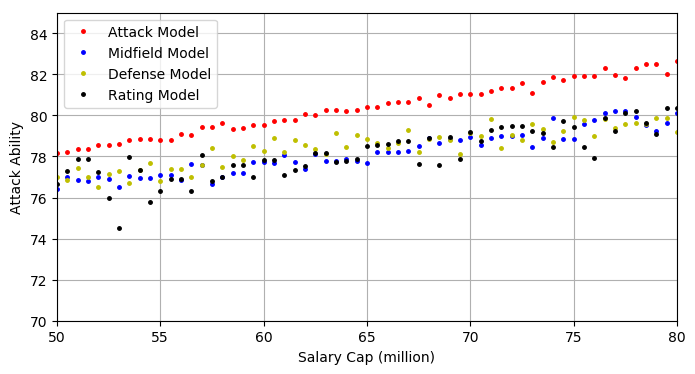

PyObject <matplotlib.legend.Legend object at 0x162f48198>

In [75]:
using JuMP, DataFrames, PyPlot

Num = 11        # Total players in a team

figure(figsize=(8,4))
for maxSalary = 50:0.5:80
    (R1, Ra1, Rm1, Rd1, xopt1) = attackModel(λ, CBlimit, maxSalary, raw)
    (R2, Ra2, Rm2, Rd2, xopt2) = midfieldModel(λ, CBlimit, maxSalary, raw)
    (R3, Ra3, Rm3, Rd3, xopt3) = defendModel(λ, CBlimit, maxSalary, raw)
    (R4, Ra4, Rm4, Rd4, xopt4) = rateModel(CBlimit, maxSalary, raw)
    plot(maxSalary, Ra1,"r.", markersize=5)
    plot(maxSalary, Ra2,"b.", markersize=5)
    plot(maxSalary, Ra3,"y.", markersize=5)
    plot(maxSalary, Ra4,"k.", markersize=5)
end
axis([50,80,70,85])
grid("on")
ylabel("Attack Ability")
xlabel("Salary Cap (million)")
legend(["Attack Model", "Midfield Model", "Defense Model", "Rating Model"])

### In the second graph, midfield model has the highest midfield ability, and the attack model possess the second highest stats. 

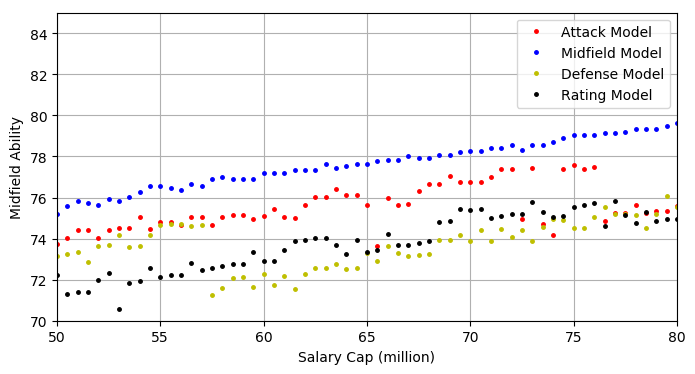

PyObject <matplotlib.legend.Legend object at 0x1621e1a58>

In [37]:
using JuMP, DataFrames, PyPlot

Num = 11        # Total players in a team

figure(figsize=(8,4))
for maxSalary = 50:0.5:80
    (R1, Ra1, Rm1, Rd1, xopt1) = attackModel(λ, CBlimit, maxSalary, raw)
    (R2, Ra2, Rm2, Rd2, xopt2) = midfieldModel(λ, CBlimit, maxSalary, raw)
    (R3, Ra3, Rm3, Rd3, xopt3) = defendModel(λ, CBlimit, maxSalary, raw)
    (R4, Ra4, Rm4, Rd4, xopt4) = rateModel(CBlimit, maxSalary, raw)
    plot(maxSalary, Rm1,"r.", markersize=5)
    plot(maxSalary, Rm2,"b.", markersize=5)
    plot(maxSalary, Rm3,"y.", markersize=5)
    plot(maxSalary, Rm4,"k.", markersize=5)
end
axis([50,80,70,85])
grid("on")
ylabel("Midfield Ability")
xlabel("Salary Cap (million)")
legend(["Attack Model", "Midfield Model", "Defense Model", "Rating Model"])

### In the third graph, defense model has the highest defensive ability but the rating model has significantly lower defensive ability than the other three.

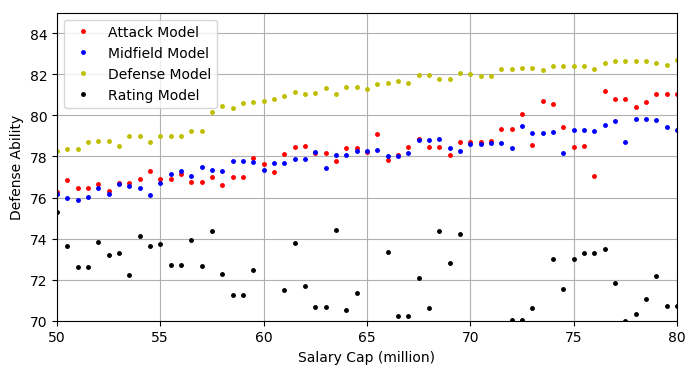

PyObject <matplotlib.legend.Legend object at 0x162396390>

In [38]:
using JuMP, DataFrames, PyPlot

Num = 11        # Total players in a team

figure(figsize=(8,4))
for maxSalary = 50:0.5:80
    (R1, Ra1, Rm1, Rd1, xopt1) = attackModel(λ, CBlimit, maxSalary, raw)
    (R2, Ra2, Rm2, Rd2, xopt2) = midfieldModel(λ, CBlimit, maxSalary, raw)
    (R3, Ra3, Rm3, Rd3, xopt3) = defendModel(λ, CBlimit, maxSalary, raw)
    (R4, Ra4, Rm4, Rd4, xopt4) = rateModel(CBlimit, maxSalary, raw)
    plot(maxSalary, Rd1,"r.", markersize=5)
    plot(maxSalary, Rd2,"b.", markersize=5)
    plot(maxSalary, Rd3,"y.", markersize=5)
    plot(maxSalary, Rd4,"k.", markersize=5)
end
axis([50,80,70,85])
grid("on")
ylabel("Defense Ability")
xlabel("Salary Cap (million)")
legend(["Attack Model", "Midfield Model", "Defense Model", "Rating Model"])

### In the fourth graph, rating model has the highest overall rating, and three other models has similar values of rating. 

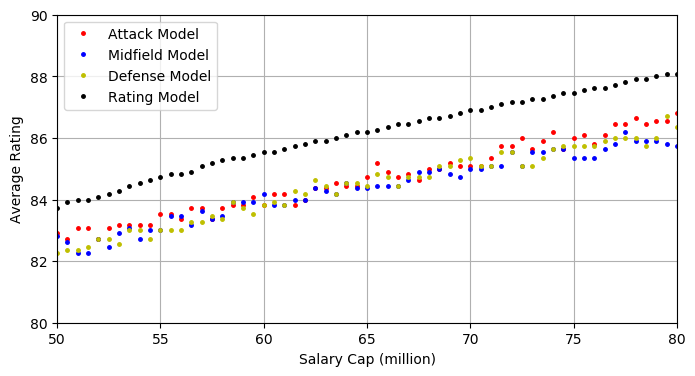

PyObject <matplotlib.legend.Legend object at 0x162886908>

In [39]:
using JuMP, DataFrames, PyPlot

Num = 11        # Total players in a team

figure(figsize=(8,4))
for maxSalary = 50:0.5:80
    (R1, Ra1, Rm1, Rd1, xopt1) = attackModel(λ, CBlimit, maxSalary, raw)
    (R2, Ra2, Rm2, Rd2, xopt2) = midfieldModel(λ, CBlimit, maxSalary, raw)
    (R3, Ra3, Rm3, Rd3, xopt3) = defendModel(λ, CBlimit, maxSalary, raw)
    (R4, Ra4, Rm4, Rd4, xopt4) = rateModel(CBlimit, maxSalary, raw)
    plot(maxSalary, R1,"r.", markersize=5)
    plot(maxSalary, R2,"b.", markersize=5)
    plot(maxSalary, R3,"y.", markersize=5)
    plot(maxSalary, R4,"k.", markersize=5)
end
axis([50,80,80,90])
grid("on")
ylabel("Average Rating")
xlabel("Salary Cap (million)")
legend(["Attack Model", "Midfield Model", "Defense Model", "Rating Model"])

Therefore, if the user want to build up a team that has decent performance in all four aspects, they will be suggested to choose the attack model; if the user want to build up a team that has great midfield and defense abilities but not requires a really good attack ability, they will be suggested to choose the midfield model; if the user want to build up a team that strongly on defensive based but not on other aspects (especially for midfield), they can be suggested to choose the defensive model; if the user want to build up a team that looks fancy (high rating) but not really stable, they can be suggested to choose the rating model. 

### Limitation:
Our first limitation is that the model is heavily depending on the quality of data, the data is based on the FIFA game forum and is analyzed by the function analyzeData(). However, only taking the mean of the data may not produce the exact performance of each player. 

One possible improvement we can do with this is: in the function anaylzeData(), we can calculate the standard deviation of all values in each type of abilities and find out the p-value of each player in the whole dataset. In that way, we can possibly find out the real ranking of each player in dataset.

Our second limitation is that the age of a player may affect his performance. Normally the peak age of a soccer should be 25 to 27. The performance of a player may fall down after that range. 

One possible solution for this is that we can create a function that connect between the age and abilities. When a player is at his age of 25-27, his ability is not changed. However, when the player’s age is smaller or larger than that, some deductions can be made based on his original value.

A model with error is shown below.

In [76]:
using JuMP, Cbc

function wrongattackModel(λ, CBlimit, maxSalary, raw)
    
    N = size(raw)[1]                   # Number of players
    GKindex = find(raw[:,6].=="GK")    # Rows containing GK's
    LWindex = find(raw[:,6].=="LW")    # Rows containing LW's
    RWindex = find(raw[:,6].=="RW")    # Rows containing RW's
    STindex = find(raw[:,6].=="ST")    # Rows containing ST's
    CFindex = find(raw[:,6].=="CF")    # Rows containing CF's
    CMindex = find(raw[:,6].=="CM")    # Rows containing CM's
    LMindex = find(raw[:,6].=="LM")    # Rows containing LM's
    RMindex = find(raw[:,6].=="RM")    # Rows containing RM's
    CAMindex = find(raw[:,6].=="CAM")  # Rows containing CAM's
    CDMindex = find(raw[:,6].=="CDM")  # Rows containing CDM's
    CBindex = find(raw[:,6].=="CB")    # Rows containing CB's
    LBindex = find(raw[:,6].=="LB")    # Rows containing LB's
    RBindex = find(raw[:,6].=="RB")    # Rows containing RB's
    
    clubs = unique(raw[:,7])           # List of unique clubs of the players
    Num = 11                           # Total players in a team
    T = length(clubs)                  # Number of unique clubs
    minLimit = 0                       # Minimum number of player in every position (0)
    minForward = 1                     # Minimum number of forward players(including LW, RW, ST, CF)
    maxForward = 3                     # Maximum number of forward players(including LW, RW, ST, CF)
    minMid = 3                         # Minimum number of midfield players(including CM, CAM, CDM, LM, RM)
    maxMid = 5                         # Maximum number of midfield players(including CM, CAM, CDM, LM, RM)
    minBack = 2                        # Minimum number of back players(including CB, LB, RB)
    maxBack = 4                        # Maximum number of back players(including CB, LB, RB)
    
    # Maximum number of player in every position
    GKlimit = LWlimit = RWlimit = STlimit = CFlimit = CMlimit = CAMlimit = 1  
    CDMlimit = LMlimit = RMlimit = CAMlimit =  LBlimit = RBlimit = 1
    CBlimit = 2
    
    m = Model(solver=CbcSolver())
    
    @variable(m, k[1:N], Bin)             # Indicator variable:  1- Player on team, 0- Player not on team
    @constraint(m, sum{k[i]*raw[i,2], i=1:N} <= maxSalary)           # Salary cap constraint
    @constraint(m, sum{k[i], i = GKindex} == GKlimit)                # Number of GK's constraint
    @constraint(m, minLimit <= sum{k[i], i = LWindex} <= LWlimit)    # Number of LW's constraint
    @constraint(m, minLimit <= sum{k[i], i = RWindex} <= RWlimit)    # Number of RW's constraint
    @constraint(m, minLimit <= sum{k[i], i = STindex} <= STlimit)    # Number of ST's constraint
    @constraint(m, minLimit <= sum{k[i], i = CFindex} <= CFlimit)    # Number of CF's constraint
    @constraint(m, minLimit <= sum{k[i], i = CMindex} <= CMlimit)    # Number of CM's constraint
    @constraint(m, minLimit <= sum{k[i], i = LMindex} <= LMlimit)    # Number of LM's constraint
    @constraint(m, minLimit <= sum{k[i], i = RMindex} <= RMlimit)    # Number of RM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CAMindex} <= CAMlimit)  # Number of CAM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CDMindex} <= CDMlimit)  # Number of CDM's constraint
    @constraint(m, minLimit <= sum{k[i], i = CBindex} <= CBlimit)    # Number of CB's constraint
    @constraint(m, minLimit <= sum{k[i], i = LBindex} <= LBlimit)    # Number of LB's constraint
    @constraint(m, minLimit <= sum{k[i], i = RBindex} <= RBlimit)    # Number of RB's constraint
    
    # Number of players(forward, midfield and back)constraint
    @constraint(m, minForward <= sum{k[i], i = [LWindex; RWindex; STindex; CFindex]} <= maxForward)
    @constraint(m, minMid <= sum{k[i], i = [CMindex; LMindex; RMindex; CAMindex; CDMindex]} <= maxMid)
    @constraint(m, minBack <= sum{k[i], i = [CBindex; LBindex; RBindex]} <= maxBack)
    
    # Total number of players must be Num (11)
    @constraint(m, sum{k[i], i = [GKindex; LWindex; RWindex; STindex; CFindex; CMindex; LMindex; RMindex; CAMindex; CDMindex; 
                                                CBindex; LBindex; RBindex]} == Num)
    
    # Limit amount of players from one particular team
    for t = 1:T
        clubIndex = find(raw[:,7].==clubs[t])
        @constraint(m, sum{k[i], i = clubIndex} <= CBlimit)
    end
    
    # Maximize the overall ability according to the value of λ
    @objective(m, Max, λ*sum{k[i]*raw[i,21], i=1:N} + (1-λ)/2*(sum{k[i]*raw[i,34], i=1:N} + sum{k[i]*raw[i,42], i=1:N}))
    
    solve(m);
    
    Ra = getvalue(sum(k.*raw[:,21]/Num))  # Average attack ability
    Rm = getvalue(sum(k.*raw[:,34]/Num))  # Average midfield ability
    Rd = getvalue(sum(k.*raw[:,42]/Num))  # Average defensive ability
    R = getvalue(sum(k.*raw[:,1]/Num))    # Average overall ability
    Ip = getvalue(k)                    # Indicator player vector
    
    return(R, Ra, Rm, Rd, Ip)
end;

In [77]:
using JuMP, DataFrames

Num = 11        # Total players in a team

# Run attack model
(R, Ra, Rm, Rd, xopt) = wrongattackModel(λ, CBlimit, maxSalary, raw)

# Initialize data frame containing solution
sol = DataFrame(Player = String[], Position = String[], Club = String[], 
                Nation = String[], Age = Int64[], Salary = Float64[], 
                Attack = Float64[], Midfield = Float64[], Defence = Float64[], Rating = Float64[])

for i = 1:length(xopt)
    if xopt[i] == 1
        # Add to dataframe if player is selected
        push!(sol, [raw[i,4] raw[i,6] raw[i,7] raw[i,9] raw[i,10] raw[i,2] raw[i,21] raw[i,34] raw[i,42] raw[i,1]])   
    end
end

println("Total amounts of investment used (in million): ", sum(sol[:,6]))

# Add total row
 push!(sol, ["Average", "/", "/", "/", round(sum(sol[:,5])/Num), sum(sol[:,6])/Num, Ra, 
                    Rm, Rd, sum(sol[:,10])/Num])

# Display optimal team table
sol

Total amounts of investment used (in million): 68.32100000000001


,Player,Position,Club,Nation,Age,Salary,Attack,Midfield,Defence,Rating
1,Kevin,GK,Paris Saint-Germain,Germany,25,4.12,66.625,25.25,84.0,84.0
2,Neymar,LW,FC Barcelona,Brazil,24,11.256,91.0,76.0833,86.8571,91.0
3,George,RW,Legends,Northern Ireland,69,10.356,90.0,82.8333,74.8571,90.0
4,Wayne,ST,Manchester United,England,30,6.147,87.0,81.9167,70.5714,87.0
5,Stefan,CAM,Legends,Germany,47,5.356,80.75,86.0,81.2857,86.0
6,G??khan,CDM,Leicester City,Switzerland,31,5.021,74.625,80.0,77.4286,80.0
7,Ronaldo,CB,VfL Wolfsburg,Brazil,33,5.328,77.0,65.1667,86.0,86.0
8,Jan,CB,Tottenham Hotspur,Belgium,28,4.652,72.75,69.6667,82.0,82.0
9,Marcelo,LB,Real Madrid CF,Brazil,27,8.231,85.875,84.6667,89.0,89.0
10,Gareth,RM,Real Madrid CF,Wales,26,7.854,88.5,87.0,71.2857,87.0


During running our codes and viewing the table results, we found out that there was one constraint that might affect our optimal solution. When we set up the constraint of maximum club member, our output might have less than 11 palyers, which was not consistent with the constriant of team member. We guessed that the problem might be the small size of our database. We noticed the improtance of the size of databse: larger size of databse could result in more preciese soultion. 

## 5. Conclusion ##

Our report demonstrates two models to automatically pick soccer player depend on different personal preferences from user in FIFA game. We based on four different game plans to optimize the maximum the players’ scores to form a team. However, the data is basically selected from FIFA database and it might not really reflected the real world situation. Furthermore, we use couple main variable to operate our model, player’s attack, midfield and defense rate, players’ salary and player’s position on the field. Lastly, we add the constraint that the maximum player from the same club to form a team. We are able to come up a combination of soccer team that based on our database. More importantly, people are able to personalize their own preference on different type of team they want. For the further improvement, it could find a better way to interact with players’ score instead of taking average score from certain column in database. Also, we divide attack, midfield and defense score by ourselves which could improve as well. In order to find better way to simulate real world situation, set up more accurate database and find more precise functions to interact database is crucial. 